In [1]:
import urllib.request
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

Import data

In [2]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv')

In [8]:
covid_data.head(30)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,03/05/2020,3,0,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,03/06/2020,8,0,8,0,0,3,3,5,0,...,0,1,0,0,0,0,0,0,0,0
7,03/07/2020,7,0,8,0,0,3,3,6,0,...,0,0,0,0,0,0,0,0,0,0
8,03/08/2020,21,0,18,0,0,6,6,8,0,...,0,0,0,0,0,0,0,0,0,0
9,03/09/2020,57,0,39,0,0,15,15,14,0,...,0,2,0,0,1,1,1,0,0,0


Text(0.5, 0, 'Date')

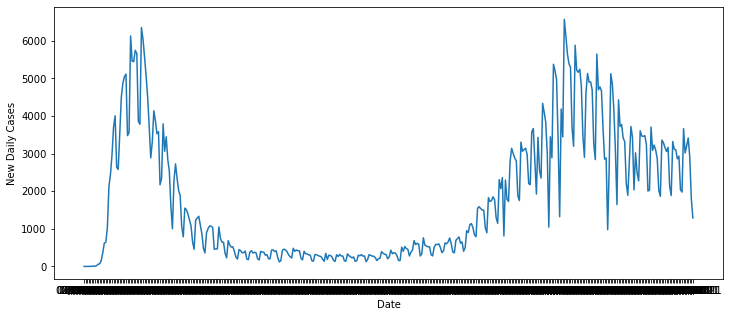

In [5]:
plt.figure(figsize=(12,5))
plt.plot(covid_data["date_of_interest"], covid_data["CASE_COUNT"])
plt.ylabel("New Daily Cases")
plt.xlabel("Date")

I want to make sure I get as much of the peaks of the data in my analysis, so I'll only use the first year of the data, and will download the MTA data for the corresponding time period in both 2019-20 and 2020-21.

In [10]:
covid_sample = covid_data.head(365)
covid_sample

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,02/23/2021,3468,1067,345,71,7,2907,3825,311,66,...,48,10,2,1,183,231,11,3,3,0
361,02/24/2021,3460,1001,364,80,3,2909,3822,320,66,...,39,6,8,0,185,231,10,4,4,0
362,02/25/2021,3478,988,303,74,7,3115,4054,325,69,...,55,11,3,0,207,256,11,4,4,0
363,02/26/2021,3241,989,325,71,3,3146,4083,326,71,...,71,13,4,0,206,256,10,5,5,0


Now, the MTA data is formatted as: "http://web.mta.info/developers/data/nyct/turnstile/turnstile_YMMdd.txt". I'd like to download the 100+ data files without having to manually enter every date.